# Importação de bibliotecas

In [7]:
pip install tensorflow

Forma dos dados de treino: (60000, 28, 28)
Forma dos rótulos de treino: (60000, 10)
Forma dos dados de teste: (10000, 28, 28)
Forma dos rótulos de teste: (10000, 10)


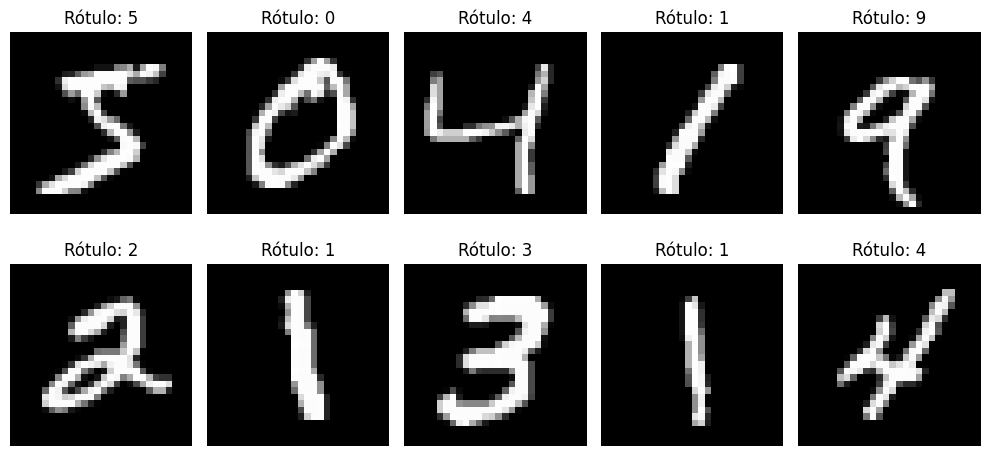

In [8]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GaussianNoise
from tensorflow.keras.utils import to_categorical
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Definir semente aleatória para reprodutibilidade
np.random.seed(47)
tf.random.set_seed(47)

# Carregar o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converter rótulos para o formato categórico (one-hot encoding)
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Imprimir o formato dos dados
print(f"Forma dos dados de treino: {X_train.shape}")
print(f"Forma dos rótulos de treino: {y_train_categorical.shape}")
print(f"Forma dos dados de teste: {X_test.shape}")
print(f"Forma dos rótulos de teste: {y_test_categorical.shape}")

# Vamos visualizar alguns dos exemplos de treino
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Definições de Funções

In [9]:
def create_model(noise_stddev=0.3):
    """
    Criar um modelo de rede neural com ruído Gaussiano

    Parâmetros:
    - noise_stddev: Desvio padrão do ruído Gaussiano

    Retorna:
    - model: Modelo Keras compilado
    """
    model = Sequential([
        # Adicionar ruído Gaussiano na entrada - isso ajuda na robustez
        GaussianNoise(noise_stddev, input_shape=(28, 28)),

        # Achatar as imagens 28x28 em um array 1D
        Flatten(),

        # Primeira camada oculta
        Dense(128, activation='relu'),
        Dropout(0.3),

        # Segunda camada oculta (opcional - você pode experimentar)
        Dense(64, activation='relu'),
        Dropout(0.2),

        # Camada de saída - 10 nós para dígitos de 0 a 9
        Dense(10, activation='softmax')
    ])

    # Compilar o modelo
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_and_evaluate_model(batch_size, epochs=10, noise_stddev=0.3):
    """
    Treinar um modelo com o tamanho de lote especificado e avaliá-lo

    Parâmetros:
    - batch_size: Tamanho dos lotes para o treinamento
    - epochs: Número de épocas de treinamento
    - noise_stddev: Desvio padrão do ruído Gaussiano

    Retorna:
    - model: Modelo treinado
    - history: Histórico do treinamento
    - training_time: Tempo de treinamento
    """
    print(f"Treinando com tamanho de lote: {batch_size}")

    # Criar o modelo
    model = create_model(noise_stddev)

    # Medir o tempo de treinamento
    start_time = time.time()

    # Treinar o modelo
    history = model.fit(
        X_train, y_train_categorical,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=1
    )

    training_time = time.time() - start_time
    print(f"Tempo de treinamento: {training_time:.2f} segundos")

    # Avaliar o modelo nos dados de teste
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    print(f"Acurácia no teste: {test_acc:.4f}")

    return model, history, training_time

def plot_learning_curves(histories, batch_sizes):
    """
    Plotar curvas de aprendizado para diferentes tamanhos de lote - apenas dados de treinamento

    Parâmetros:
    - histories: Lista de históricos de treinamento
    - batch_sizes: Lista dos tamanhos de lote usados
    """
    plt.figure(figsize=(12, 5))

    # Plotar acurácia de treinamento
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Batch {batch_sizes[i]}')

    plt.title('Acurácia do Treinamento do Modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend()

    # Plotar perda de treinamento
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Batch {batch_sizes[i]}')

    plt.title('Perda do Treinamento do Modelo')
    plt.ylabel('Perda')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.show()

def visualize_noise_effect(image_idx=0, noise_levels=[0, 0.1, 0.3, 0.5]):
    """
    Visualizar o efeito de diferentes níveis de ruído em uma imagem

    Parâmetros:
    - image_idx: Índice da imagem a ser visualizada
    - noise_levels: Lista de desvios padrão de ruído a aplicar
    """
    plt.figure(figsize=(12, 3))

    # Imagem original
    plt.subplot(1, len(noise_levels), 1)
    plt.imshow(X_train[image_idx], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Imagens com ruído
    for i, noise in enumerate(noise_levels[1:]):
        noisy_img = X_train[image_idx] + np.random.normal(0, noise, X_train[image_idx].shape)
        noisy_img = np.clip(noisy_img, 0, 1)  # Manter valores no intervalo [0,1]

        plt.subplot(1, len(noise_levels), i+2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title(f'Ruído σ={noise}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Treinamento

Treinando com tamanho de lote: 16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7562 - loss: 0.7476 - val_accuracy: 0.9620 - val_loss: 0.1361
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9030 - loss: 0.3207 - val_accuracy: 0.9717 - val_loss: 0.1059
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9184 - loss: 0.2706 - val_accuracy: 0.9737 - val_loss: 0.0964
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9229 - loss: 0.2521 - val_accuracy: 0.9762 - val_loss: 0.0870
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9281 - loss: 0.2295 - val_accuracy: 0.9777 - val_loss: 0.0804
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9331 - loss: 0.2221 - val_accuracy: 0.9760 - val_loss: 0.0803
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9340 - loss: 0.2142 - val_accuracy: 0.9785 - val_loss: 0.0784
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9367 - loss: 0

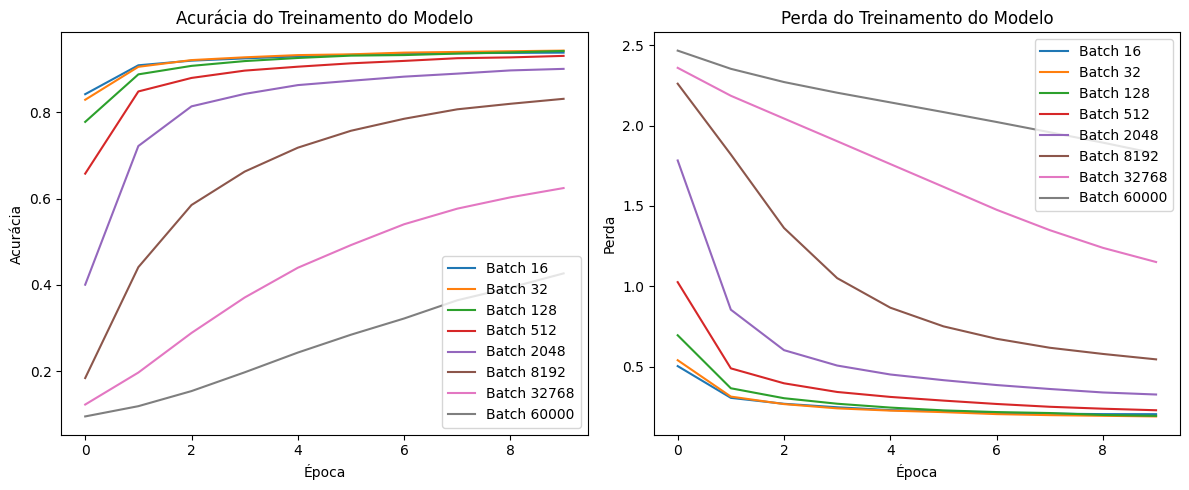

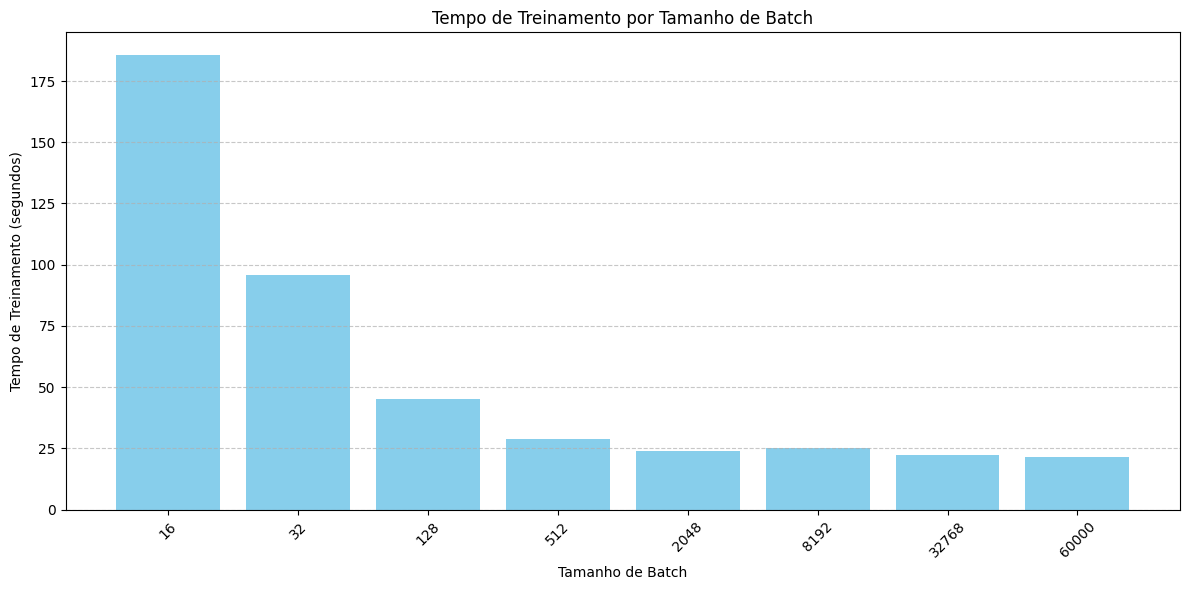

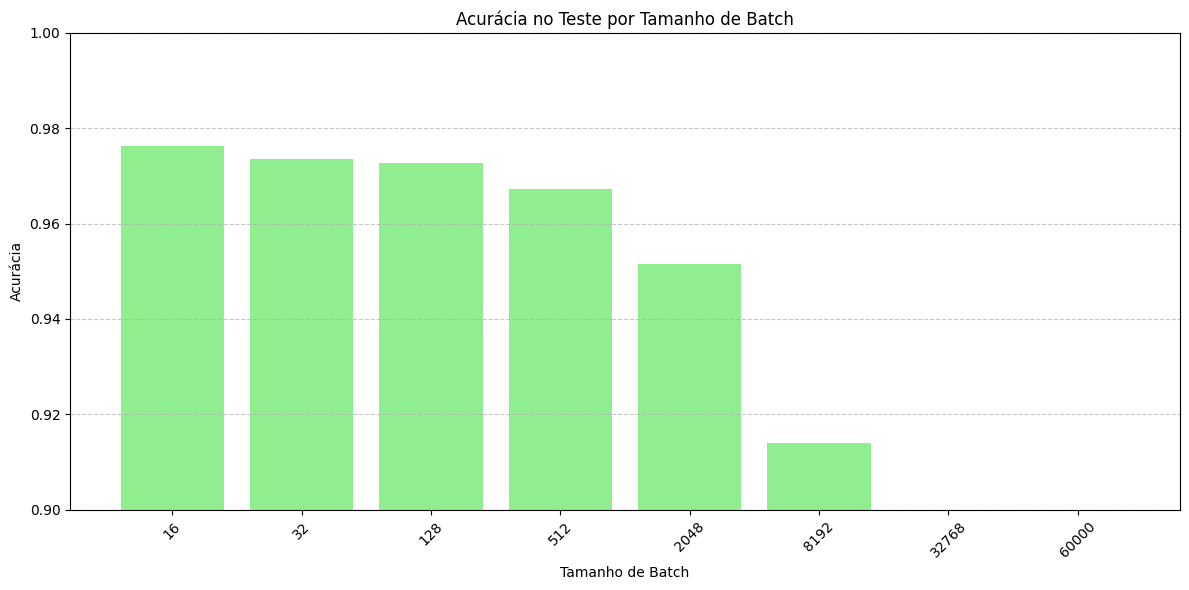

Melhor modelo usa tamanho de batch: 16
Melhor acurácia no teste: 0.9763
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


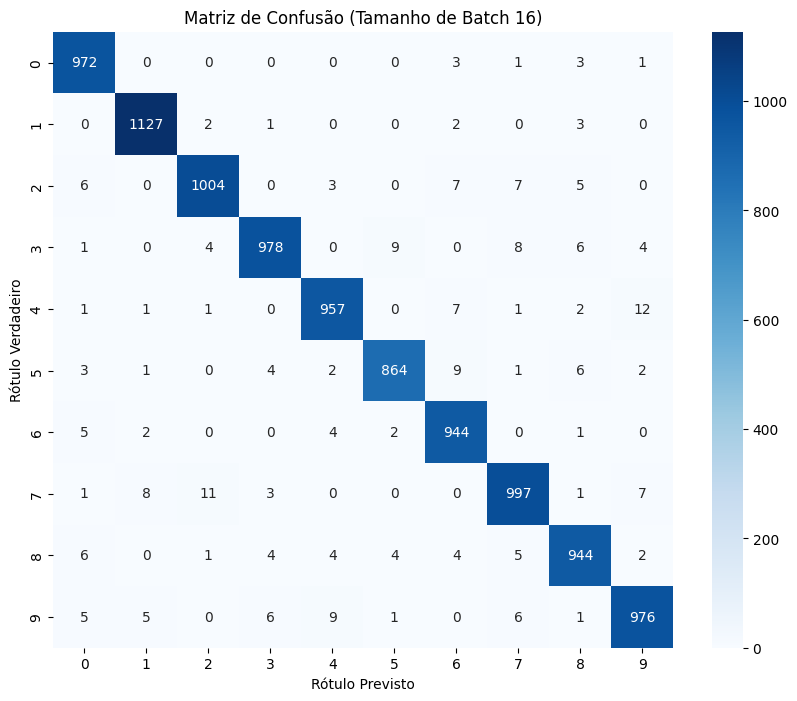


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Resultados da Comparação dos Tamanhos de Batch:


,Tamanho de Batch,Tempo de Treinamento (s),Acurácia no Teste,Épocas por Segundo,Passos por Época,Acurácia Final no Treinamento
0,16,185.588059,0.9763,0.053883,3750,0.937611
1,32,95.660512,0.9736,0.104536,1875,0.942259
2,128,45.154269,0.9728,0.221463,469,0.941444
3,512,28.904249,0.9673,0.345970,118,0.930074
4,2048,24.008429,0.9515,0.416520,30,0.900037
5,8192,25.208266,0.9139,0.396695,8,0.830759
6,32768,22.440592,0.8118,0.445621,2,0.624278
7,60000,21.697575,0.6573,0.460881,1,0.426852


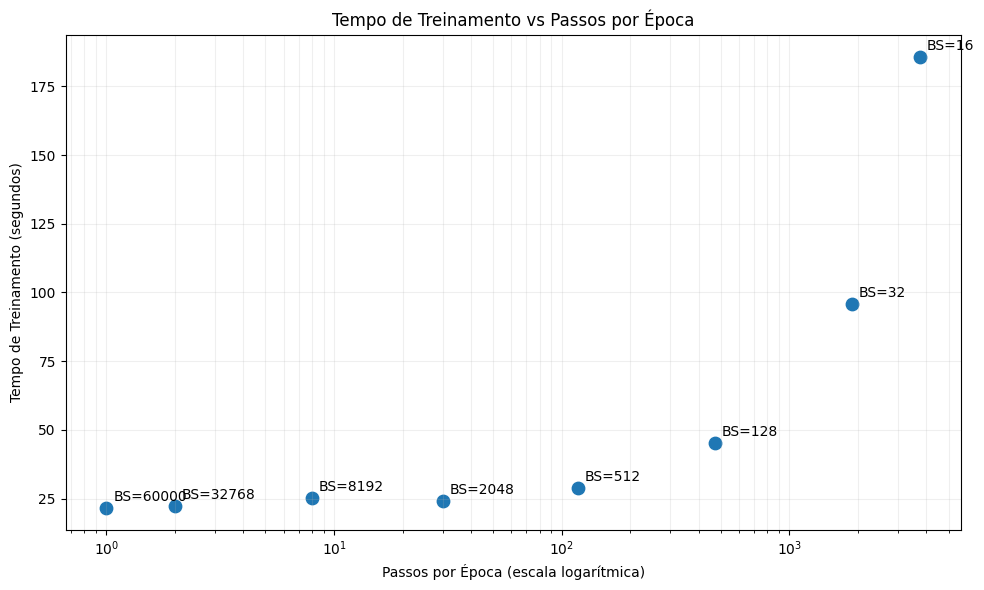

In [10]:
# Define tamanhos de batch para comparar - agora incluindo mais opções
batch_sizes = [16, 32, 128, 512, 2048, 8192, 32768, len(X_train)]  # O último é o batch completo (gradiente descendente)
noise_stddev = 0.3
epochs = 10

# Listas para armazenar os resultados
models = []
histories = []
training_times = []

# Treinar modelos com diferentes tamanhos de batch
for batch_size in batch_sizes:
    model, history, training_time = train_and_evaluate_model(
        batch_size=batch_size,
        epochs=epochs,
        noise_stddev=noise_stddev
    )

    models.append(model)
    histories.append(history)
    training_times.append(training_time)

    print("-" * 50)

# Plotar curvas de aprendizado (apenas dados de treino)
plot_learning_curves(histories, batch_sizes)

# Comparar tempos de treinamento
plt.figure(figsize=(12, 6))
plt.bar([str(bs) for bs in batch_sizes], training_times, color='skyblue')
plt.title('Tempo de Treinamento por Tamanho de Batch')
plt.xlabel('Tamanho de Batch')
plt.ylabel('Tempo de Treinamento (segundos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização com mais tamanhos de batch
plt.tight_layout()
plt.show()

# Comparar acurácia final no teste
test_accuracies = []
for i, model in enumerate(models):
    _, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    test_accuracies.append(test_acc)

plt.figure(figsize=(12, 6))
plt.bar([str(bs) for bs in batch_sizes], test_accuracies, color='lightgreen')
plt.title('Acurácia no Teste por Tamanho de Batch')
plt.xlabel('Tamanho de Batch')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.0)  # Ajustar conforme necessário com base nos seus resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização com mais tamanhos de batch
plt.tight_layout()
plt.show()

# Selecionar o melhor modelo baseado na acurácia de teste
best_model_idx = np.argmax(test_accuracies)
best_model = models[best_model_idx]
best_batch_size = batch_sizes[best_model_idx]

print(f"Melhor modelo usa tamanho de batch: {best_batch_size}")
print(f"Melhor acurácia no teste: {test_accuracies[best_model_idx]:.4f}")

# Gerar previsões para matriz de confusão
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão (Tamanho de Batch {best_batch_size})')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

# Imprimir relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_classes))

# Criar uma tabela comparando os tamanhos de batch
import pandas as pd
from IPython.display import display

# Criar DataFrame para comparação
results_df = pd.DataFrame({
    'Tamanho de Batch': batch_sizes,
    'Tempo de Treinamento (s)': training_times,
    'Acurácia no Teste': test_accuracies
})

# Calcular épocas por segundo para comparação
results_df['Épocas por Segundo'] = epochs / results_df['Tempo de Treinamento (s)']

# Adicionar uma coluna para passos por época
results_df['Passos por Época'] = np.ceil(len(X_train) / results_df['Tamanho de Batch']).astype(int)

# Adicionar coluna para a acurácia final no treinamento
final_train_accuracies = [history.history['accuracy'][-1] for history in histories]
results_df['Acurácia Final no Treinamento'] = final_train_accuracies

# Mostrar a tabela de resultados
print("\nResultados da Comparação dos Tamanhos de Batch:")
display(results_df)

# Também criar um gráfico comparando passos por época vs tempo de treinamento
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Passos por Época'], results_df['Tempo de Treinamento (s)'], s=80)
for i, bs in enumerate(batch_sizes):
    plt.annotate(f"BS={bs}", (results_df['Passos por Época'][i], results_df['Tempo de Treinamento (s)'][i]),
                 xytext=(5, 5), textcoords='offset points')
plt.title('Tempo de Treinamento vs Passos por Época')
plt.xlabel('Passos por Época (escala logarítmica)')
plt.ylabel('Tempo de Treinamento (segundos)')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()

# Teste do bot para acuracia

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━

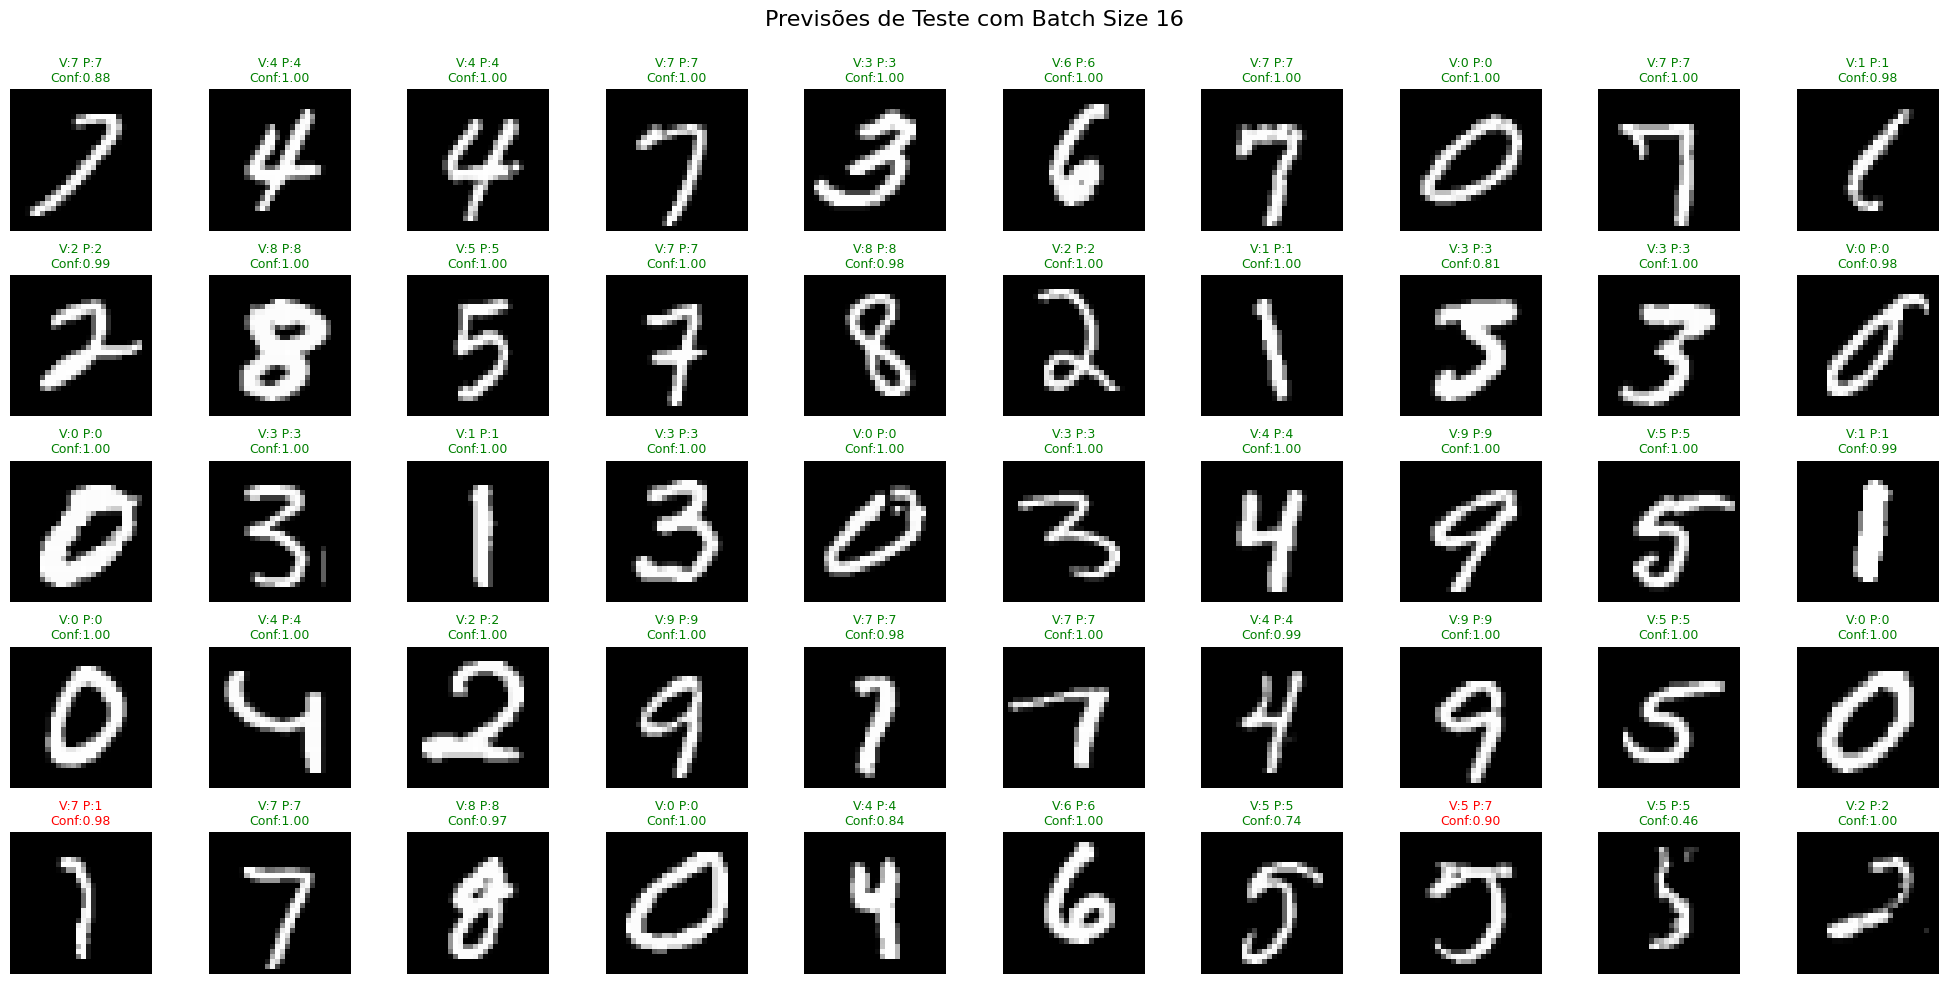

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [11]:
def predict_digit(model, image_array):
    """
    Prediz um dígito dado um array de imagem

    Parâmetros:
    - model: Modelo Keras treinado
    - image_array: Array de imagem normalizado (28x28)

    Retorna:
    - predicted_digit: O dígito previsto
    - confidence: Nível de confiança da previsão
    """
    # Garante que a imagem esteja no formato correto
    if image_array.shape != (28, 28):
        raise ValueError("A imagem deve ter 28x28 pixels")

    # Normaliza se necessário
    if image_array.max() > 1.0:
        image_array = image_array / 255.0

    # Redimensiona para a previsão
    image_for_prediction = image_array.reshape(1, 28, 28)

    # Faz a previsão
    predictions = model.predict(image_for_prediction)[0]
    predicted_digit = np.argmax(predictions)
    confidence = predictions[predicted_digit]

    return predicted_digit, confidence

# Função para testar imagens aleatórias de teste
def test_random_predictions(model, num_samples=50):
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    # Cria uma grade de subplots (5 linhas x 10 colunas para 50 imagens)
    rows = 5
    cols = 10
    plt.figure(figsize=(20, 10))

    for i, idx in enumerate(indices):
        # Obtém a imagem
        test_image = X_test[idx]

        # Faz a previsão
        predicted_digit, confidence = predict_digit(model, test_image)

        # Compara com o rótulo verdadeiro
        true_digit = y_test[idx]

        # Define a cor do título baseado na correção da previsão
        title_color = 'green' if predicted_digit == true_digit else 'red'

        # Exibe
        plt.subplot(rows, cols, i+1)
        plt.imshow(test_image, cmap='gray')
        plt.title(f"V:{true_digit} P:{predicted_digit}\nConf:{confidence:.2f}",
                  color=title_color, fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(f"Previsões de Teste com Batch Size {best_batch_size}", fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adiciona espaço para o título
    plt.show()

    # Calcula e imprime a acurácia nessas 50 amostras
    correct = 0
    for idx in indices:
        test_image = X_test[idx]
        predicted_digit, _ = predict_digit(model, test_image)
        true_digit = y_test[idx]
        if predicted_digit == true_digit:
            correct += 1

    print(f"Acurácia nestas 50 amostras aleatórias: {correct/num_samples:.2%}")

# Testa previsões usando o melhor modelo com 50 imagens
best_model = models[best_model_idx]
test_random_predictions(best_model, num_samples=50)

# Salva o melhor modelo para uso futuro (opcional)
# best_model.save('mnist_batch_size_comparison_best_model.h5')
print("Concluído! O modelo com o melhor desempenho foi analisado.")
